### Read Dataset

In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/HP/Desktop/ETLHive/Project 3/training_set.csv")
test = pd.read_csv("C:/Users/HP/Desktop/ETLHive/Project 3/testing_set.csv")

In [2]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

### Missing data treatment

In [5]:
train.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [7]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
from PM6 import replacer
replacer(train)
replacer(test)

In [9]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Data Analysis

In [11]:
print(train["Gender"].value_counts())
print(train["Married"].value_counts())
print(train["Dependents"].value_counts())
print(train["Education"].value_counts())
print(train["Self_Employed"].value_counts())
print(train["Property_Area"].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [12]:
train = train.replace(to_replace = '3+',value = 4)
#train.head(10)

In [13]:
test = test.replace(to_replace = '3+',value = 4)
#test.head(10)

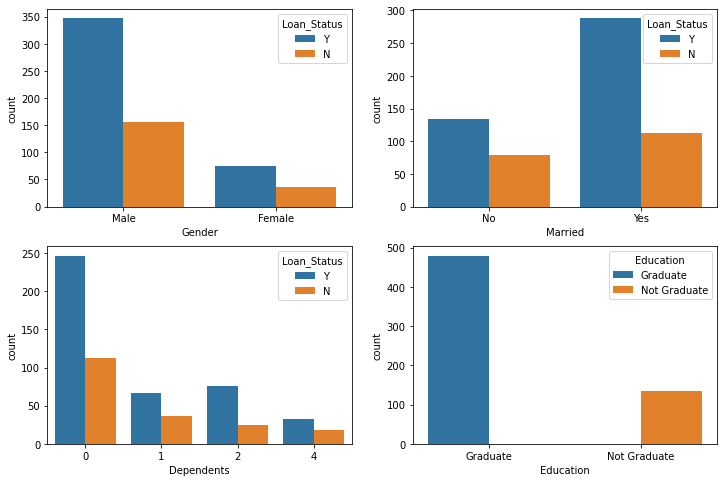

In [14]:
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sb.countplot(x="Gender",hue="Loan_Status",data=train);

plt.subplot(2,2,2)
sb.countplot(x="Married",hue="Loan_Status",data=train);

plt.subplot(2,2,3)
sb.countplot(x="Dependents",hue="Loan_Status",data=train);

plt.subplot(2,2,4)
sb.countplot(x="Education",hue="Education",data=train);

1. Chance of getting loan approved for male is higher than female
2. Chance of getting loan approved for married person is higher than unmarried
3. Chance of getting loan approved for person having 0 dependents is higher 
4. Chance of getting loan approved for gruduate person is higher than ungraduate

### Check if customer is eligible for loan or not

### Define X and Y

In [15]:
Y = train[["Loan_Status"]]
X = train.drop(labels=["Loan_ID","Loan_Status"],axis=1)          #Loan_ID is statistically unimportant

### EDA

In [16]:
#Seperating categorical and continuous data
from PM6 import catconsep
cat,con =catconsep(X)

In [17]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [18]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [19]:
#Y[cat] <---> X[con] --> ANOVA/boxplot
#Y[cat] <---> X[cat] --> CHISQ/Countplot with Hue

imp_cols = []
from PM6 import ANOVA,chisq
for i in con:
    q = ANOVA(train,"Loan_Status",i)
    print("--------------")
    print("Loan_Status Vs",i)
    print("p-value:",q)
    if(q<=0.15):                   #None of the columns have p-value<0.05 hence taken as <0.15
        imp_cols.append(i)

--------------
Loan_Status Vs ApplicantIncome
p-value: 0.90252
--------------
Loan_Status Vs CoapplicantIncome
p-value: 0.14239
--------------
Loan_Status Vs LoanAmount
p-value: 0.36769
--------------
Loan_Status Vs Loan_Amount_Term
p-value: 0.60396
--------------
Loan_Status Vs Credit_History
p-value: 0.0


In [20]:
ANOVA

<function PM6.ANOVA(df, cat, con)>

In [21]:
for i in cat:
    q = chisq(train,"Loan_Status",i)
    print("--------------")
    print("Loan_Status Vs",i)
    print("p-value:",q)
    if(q<=0.15):                   #None of the columns have p-value<0.05 hence taken as <0.15
        imp_cols.append(i)

--------------
Loan_Status Vs Gender
p-value: 0.73915
--------------
Loan_Status Vs Married
p-value: 0.02961
--------------
Loan_Status Vs Dependents
p-value: 0.36887
--------------
Loan_Status Vs Education
p-value: 0.0431
--------------
Loan_Status Vs Self_Employed
p-value: 1.0
--------------
Loan_Status Vs Property_Area
p-value: 0.00214


In [22]:
chisq

<function PM6.chisq(df, cat1, cat2)>

In [23]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area']

### Preprocessing

In [24]:
X.skew()

Dependents           1.456965
ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [25]:
from numpy import log

def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(log(i))
        else:
            q.append(i)
    df[col] = q

In [26]:
skew_rem(X,'ApplicantIncome')
skew_rem(X,'CoapplicantIncome')

In [27]:
X.skew()

Dependents           1.456965
ApplicantIncome      0.477562
CoapplicantIncome   -0.172920
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [28]:
from PM6 import preprocessing
Xnew = preprocessing(X[imp_cols])

In [29]:
Xnew.head(3)

,CoapplicantIncome,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.107731,0.45164,1,0,1,0,0,0,1
1,0.782215,0.45164,0,1,1,0,1,0,0
2,-1.107731,0.45164,0,1,1,0,0,0,1


### Splitting data into training and testing dataset

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [32]:
tr_acc

0.8044806517311609

In [33]:
ts_acc

0.8130081300813008

### Decision Tree Classifier

In [34]:
X = train.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [35]:
tr_acc

1.0

In [36]:
ts_acc

0.6910569105691057

In [37]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
tg = {"max_depth":range(1,30,1)}
cv = GridSearchCV(dtc,tg,scoring="recall",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 1}

In [38]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
tg = {"min_samples_leaf":range(1,30,1)}
cv = GridSearchCV(dtc,tg,scoring="recall",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 1}

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import recall_score
print("training Recall ",recall_score(ytrain,pred_tr,pos_label="Y"))
print("testing Recall: ",recall_score(ytest,pred_ts,pos_label="Y"))

training Recall  0.9881305637982196
testing Recall:  0.9647058823529412


In [40]:
from sklearn.metrics import confusion_matrix
print("training CM ",confusion_matrix(ytrain,pred_tr))
print("testing CM: ",confusion_matrix(ytest,pred_ts))

training CM  [[ 67  87]
 [  4 333]]
testing CM:  [[19 19]
 [ 3 82]]


### Adaboost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
model = abc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
print(tr_acc)
print(ts_acc)

0.9063136456211812
0.7073170731707317


In [42]:
from sklearn.model_selection import GridSearchCV
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
tg = {"n_estimators":range(2,50,1)}
cv = GridSearchCV(abc,tg,scoring="recall",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 2}

In [43]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=2)
model = abc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
print(tr_acc)
print(ts_acc)

0.814663951120163
0.8211382113821138


In [44]:
xtrain.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_4', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### Make predictions using best model

In [51]:
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(Xnew,Y)

In [52]:
from PM6 import preprocessing
test_new=test.drop(labels=["Loan_ID"],axis=1)
test_new=preprocessing(test_new)
test_new.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [53]:
test_new.shape

(367, 20)

In [54]:
pred = model.predict(test_new)

In [55]:
test["pred_loan_status"] = pred

In [56]:
pred_loan_status = test[["Loan_ID"]]
pred_loan_status["Loan_Status"] = pred
pred_loan_status.to_csv("C:/Users/HP/Desktop/ETLHive/Project 3/submission.csv",index=False)

In [57]:
pred_loan_status

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [58]:
pd.DataFrame([X.columns,dtc.feature_importances_]).T

,0,1
0,Gender,0.0
1,Married,0.042743
2,Dependents,0.020849
3,Education,0.0
4,Self_Employed,0.936407
5,ApplicantIncome,0.0
6,CoapplicantIncome,0.0
7,LoanAmount,0.0
8,Loan_Amount_Term,0.0
9,Credit_History,0.0


### If customer is not eligible for the input required amount and duration what can be amount for the given duration.(Regression)

In [59]:
T1 = train[train.Loan_Status == "Y"]

In [60]:
T2 = test[test.pred_loan_status == "Y"]

In [61]:
T2 = T2.rename({"pred_loan_status":"Loan_Status"},axis=1)

In [62]:
trd = pd.concat([T1,T2])
trd = trd.reset_index()

In [63]:
replacer(trd)
cat,con=catconsep(trd)

In [64]:
cat.remove("Loan_ID")
con.remove("LoanAmount")
cat.remove("Loan_Status")

In [65]:
#trd.isna().sum()

In [66]:
Y = trd[["LoanAmount"]]
X = trd.drop(labels=["Loan_ID","LoanAmount","Loan_Status"],axis=1)

In [67]:
Xnew = preprocessing(X)

In [68]:
#Checking correlation between con and cat values

from PM6 import ANOVA
for i in X.columns:
    if(X[i].dtypes=='object'):
        print("ANOVA")
        print("Relation between LoanAmount and ",i)
        print(ANOVA(T1,i,'LoanAmount'))

ANOVA
Relation between LoanAmount and  Gender
0.04047
ANOVA
Relation between LoanAmount and  Married
0.0021
ANOVA
Relation between LoanAmount and  Dependents
0.00242
ANOVA
Relation between LoanAmount and  Education
0.00097
ANOVA
Relation between LoanAmount and  Self_Employed
0.00126
ANOVA
Relation between LoanAmount and  Property_Area
0.85571


In [69]:
#Checking correlation between con and con values

T1.corr()[["LoanAmount"]]

,LoanAmount
ApplicantIncome,0.613727
CoapplicantIncome,0.122415
LoanAmount,1.000000
Loan_Amount_Term,0.039909
Credit_History,-0.103500


In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain, tr_pred)
ts_err = mean_absolute_error(ytest, ts_pred)

In [71]:
tr_err

35.97241320276358

In [72]:
ts_err

38.33339156876096

In [73]:
test_new = test[test["pred_loan_status"] == "N"]
test_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,pred_loan_status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.000000,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.000000,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.000000,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.000000,Semiurban,N
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.000000,Rural,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.000000,Rural,N
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,0.825444,Rural,N


In [74]:
test_new1 = test_new.drop(labels=["pred_loan_status","Loan_ID","LoanAmount"],axis=1)

In [75]:
test_new1 = test_new1.reset_index()

In [76]:
#test_new.info()
Xnew = preprocessing(test_new1)

In [135]:
pred = model.predict(Xnew)
#pred

In [78]:
pred_loan_amt = test_new[["pred_loan_status"]]
pred_loan_amt = test_new[["Loan_ID"]]
pred_loan_amt["pred_loan_amt"] = pred
#pred_loan_amt.to_csv("C:/Users/HP/Desktop/ETLHive/Project 3/pred_loan_amount.csv",index=False)

In [79]:
pred_loan_amt.reset_index()

,index,Loan_ID,pred_loan_amt
0,7,LP001056,123.946144
1,13,LP001094,280.083811
2,25,LP001153,132.324150
3,35,LP001203,102.653023
4,55,LP001313,92.216847
...,...,...,...
59,325,LP002802,73.641375
60,339,LP002858,137.756555
61,346,LP002879,135.552585
62,351,LP002901,140.729013


In [80]:
pred_loan_amt.to_csv("C:/Users/HP/Desktop/ETLHive/Project 3/pred_loan_amount.csv",index=False)

### If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [160]:
test1 = test[(test.Loan_Amount_Term <= 240) & (test.pred_loan_status == "Y")]
test1 = test1.reset_index()

In [161]:
test2 = test1.drop(labels=["Loan_Amount_Term","Loan_ID","pred_loan_status"],axis=1)

In [162]:
test1_new = preprocessing(test2)

In [163]:
test1_new = test1_new.drop(labels=["index"], axis=1)
test1_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3.232707,-0.860428,2.896919,0.277350,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
1,-0.078113,-0.860428,-1.091463,-3.605551,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
2,-1.080417,1.411967,-0.094368,0.277350,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
3,-0.806584,-0.860428,-1.290883,0.277350,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
4,-0.506173,0.699470,0.321088,0.277350,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
5,1.035402,1.778039,1.318184,0.277350,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
6,-0.095599,-0.205559,-1.257646,0.277350,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
7,-0.271509,1.457153,0.470653,0.277350,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
8,0.115633,-0.860428,-0.260551,0.277350,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
9,-0.107140,0.301965,0.553744,0.277350,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [164]:
Y = train[["Loan_Amount_Term"]]
X = train.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

In [165]:
Xnew = preprocessing(X)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [166]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain, tr_pred)
ts_err = mean_absolute_error(ytest, ts_pred)

In [167]:
tr_err

36.580064742421115

In [168]:
ts_err

34.486120840843725

In [169]:
pred = model.predict(test1_new)

In [158]:
#Xnew.columns

In [159]:
#test1_new.columns

In [171]:
extended_duration = test1[["Loan_Amount_Term"]]
extended_duration["Extended_Duration"] = pred
extended_duration

,Loan_Amount_Term,Extended_Duration
0,240.0,348.726457
1,180.0,329.493395
2,180.0,353.877537
3,180.0,313.802735
4,180.0,348.733915
5,180.0,333.037020
6,180.0,333.180172
7,180.0,345.362904
8,180.0,326.057510
9,60.0,321.587432
